# LSTM

In [ ]:
!unzip '/content/drive/MyDrive/NIFTY 50_with_indicators_.csv.zip'

Archive:  /content/drive/MyDrive/NIFTY 50_with_indicators_.csv.zip
  inflating: NIFTY 50_with_indicators_.csv  


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import os
import math
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('NIFTY 50_with_indicators_.csv', low_memory=False)
dataset.head()

,date,open,high,low,close,volume,sma5,sma10,sma15,sma20,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
0,2015-01-09 14:30:00+05:30,8240.00,8246.75,8230.65,8237.30,0,8236.29,8231.405,8235.590000,8240.9550,...,61.689814,73.526464,80.848062,54.379094,-30.597015,15.287279,16.10,8238.233333,22.823587,0.307572
1,2015-01-09 14:35:00+05:30,8237.35,8253.15,8237.10,8252.55,0,8241.76,8233.165,8236.643333,8240.2900,...,71.692660,100.000000,87.812740,55.898471,-1.239669,15.341759,16.05,8247.600000,22.629745,0.329694
2,2015-01-09 14:40:00+05:30,8252.35,8257.30,8246.25,8252.55,0,8243.85,8235.345,8237.336667,8239.9500,...,76.588885,100.000000,91.175488,53.214617,-9.039010,15.035205,11.05,8252.033333,22.401797,0.386388
3,2015-01-09 14:45:00+05:30,8252.40,8261.90,8249.30,8258.30,0,8248.16,8239.530,8238.043333,8239.3725,...,89.514561,100.000000,100.000000,59.368719,-6.299213,14.861262,12.60,8256.500000,22.165072,0.206267
4,2015-01-09 14:50:00+05:30,8258.20,8280.70,8258.20,8275.95,0,8255.33,8245.085,8239.833333,8240.8775,...,87.055284,100.000000,100.000000,59.337410,-6.254115,15.406886,22.50,8271.616667,21.917555,0.375700


In [ ]:
dataset.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'sma5', 'sma10',
       'sma15', 'sma20', 'ema5', 'ema10', 'ema15', 'ema20', 'upperband',
       'middleband', 'lowerband', 'HT_TRENDLINE', 'KAMA10', 'KAMA20', 'KAMA30',
       'SAR', 'TRIMA5', 'TRIMA10', 'TRIMA20', 'ADX5', 'ADX10', 'ADX20', 'APO',
       'CCI5', 'CCI10', 'CCI15', 'macd510', 'macd520', 'macd1020', 'macd1520',
       'macd1226', 'MOM10', 'MOM15', 'MOM20', 'ROC5', 'ROC10', 'ROC20', 'PPO',
       'RSI14', 'RSI8', 'slowk', 'slowd', 'fastk', 'fastd', 'fastksr',
       'fastdsr', 'ULTOSC', 'WILLR', 'ATR', 'Trange', 'TYPPRICE',
       'HT_DCPERIOD', 'BETA'],
      dtype='object')

In [ ]:
dataset = dataset.drop(['volume', 'sma10', 'sma20', 'ema10', 'ema20','upperband', 'middleband',
       'lowerband', 'HT_TRENDLINE', 'KAMA10', 'KAMA20', 'KAMA30', 'SAR',
       'TRIMA5', 'TRIMA10', 'TRIMA20', 'ADX5', 'ADX10', 'ADX20', 'APO', 'CCI5',
       'CCI10', 'CCI15', 'macd510', 'macd520', 'macd1020', 'macd1520',
       'macd1226', 'MOM10', 'MOM15', 'MOM20', 'ROC5', 'ROC10', 'ROC20', 'PPO',
       'RSI14', 'RSI8', 'slowk', 'slowd', 'fastk', 'fastd', 'fastksr',
       'fastdsr', 'ULTOSC', 'WILLR', 'ATR', 'Trange', 'TYPPRICE',
       'HT_DCPERIOD', 'BETA'], axis = 1)
dataset = dataset.iloc[120017:]
dataset.isnull().sum()

date     0
open     0
high     0
low      0
close    0
sma5     0
sma15    0
ema5     0
ema15    0
dtype: int64

In [ ]:
dataset.head()

,date,open,high,low,close,sma5,sma15,ema5,ema15
120017,2021-07-09 09:15:00+05:30,15688.25,15690.70,15665.45,15675.15,15722.19,15714.59,15710.682517,15719.533987
120018,2021-07-09 09:20:00+05:30,15676.20,15676.20,15633.45,15646.95,15703.97,15710.49,15689.438345,15710.460989
120019,2021-07-09 09:25:00+05:30,15646.50,15664.95,15633.55,15654.30,15686.55,15706.91,15677.725563,15703.440865
120020,2021-07-09 09:30:00+05:30,15654.15,15669.70,15649.60,15650.45,15670.97,15703.79,15668.633709,15696.817007
120021,2021-07-09 09:35:00+05:30,15650.80,15663.45,15650.25,15656.75,15656.72,15701.04,15664.672472,15691.808631


In [ ]:
dataset.describe()

,open,high,low,close,sma5,sma15,ema5,ema15
count,11487.000000,11487.000000,11487.000000,11487.000000,11487.000000,11487.000000,11487.000000,11487.000000
mean,17265.054449,17274.174532,17255.375681,17264.872377,17264.604726,17263.927315,17264.603781,17263.923555
std,724.248718,725.132960,723.155087,724.082967,724.188729,724.559727,724.108008,724.293583
min,15548.550000,15551.000000,15514.650000,15548.150000,15552.140000,15578.450000,15558.526271,15591.538611
25%,16914.425000,16927.850000,16901.950000,16915.075000,16915.100000,16915.198333,16916.335438,16915.835209
50%,17381.250000,17390.200000,17371.350000,17380.500000,17380.380000,17378.230000,17380.199210,17378.185614
75%,17812.450000,17822.425000,17803.875000,17812.425000,17812.025000,17815.745000,17812.211733,17815.111453
max,18602.350000,18602.350000,18581.750000,18589.800000,18582.510000,18577.090000,18581.152915,18576.026647


In [ ]:
from IPython.display import HTML, display

display_Bajaj_Finance_close = HTML(
'''
<iframe src='https://flo.uri.sh/visualisation/11218353/embed' title='Interactive or visual content'
class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;'
    sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe>
    <div style='width:100%!;margin-top:4px!important;text-align:right!important;'>
    <a class='flourish-credit' href='https://public.flourish.studio/visualisation/11218353/?utm_source=embed&utm_campaign=visualisation/11218353' target='_top' style='text-decoration:none!important'>
    <img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'>
    </a></div>
'''
)

In [ ]:
display(display_Bajaj_Finance_close)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=dataset['date'][:10],
                open=dataset['open'][:100],
                high=dataset['high'][:100],
                low=dataset['low'][:100],
                close=dataset['close'][:100])])

fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, shuffle = False)

In [ ]:
train.head()

,date,open,high,low,close,sma5,sma15,ema5,ema15
120017,2021-07-09 09:15:00+05:30,15688.25,15690.70,15665.45,15675.15,15722.19,15714.59,15710.682517,15719.533987
120018,2021-07-09 09:20:00+05:30,15676.20,15676.20,15633.45,15646.95,15703.97,15710.49,15689.438345,15710.460989
120019,2021-07-09 09:25:00+05:30,15646.50,15664.95,15633.55,15654.30,15686.55,15706.91,15677.725563,15703.440865
120020,2021-07-09 09:30:00+05:30,15654.15,15669.70,15649.60,15650.45,15670.97,15703.79,15668.633709,15696.817007
120021,2021-07-09 09:35:00+05:30,15650.80,15663.45,15650.25,15656.75,15656.72,15701.04,15664.672472,15691.808631


In [ ]:
def standardize(data, mean=1, std=1):
    standardized_data = list()
    data = list(data)
    for x in data:
        standardized_data.append((x-mean)/std)
    return standardized_data

In [ ]:
def standardize_inverse(data, mean=1, std=1):
    reverse_data = list()
    data = list(data)
    for y in data:
        reverse_data.append((y*std)+mean)
    return reverse_data

In [ ]:
all_columns = list(dataset.columns[1:])
print('Number of columns: ', len(all_columns))

Number of columns:  8


In [ ]:
all_columns.remove('close')
all_columns.append('close')
all_columns

['open', 'high', 'low', 'sma5', 'sma15', 'ema5', 'ema15', 'close']

In [ ]:
df_mean = pd.DataFrame(columns = all_columns)
df_std = pd.DataFrame(columns = all_columns)

In [ ]:
means, standard_devs = [], []

for i in range(len(all_columns)):
    column_name = all_columns[i]
    means.append(np.mean(train[column_name].values))
    standard_devs.append(np.std(train[column_name].values))


In [ ]:
means

[17182.16586135597,
 17190.746370660574,
 17173.10706279247,
 17181.57783001397,
 17180.506116008186,
 17181.57742748196,
 17180.500151034703,
 17182.005212754386]

In [ ]:
df_train2 = pd.DataFrame(columns = all_columns)
df_test2 = pd.DataFrame(columns= all_columns)

In [ ]:
for i in range(len(all_columns)):
    column_name = all_columns[i]
    df_train2[column_name] = standardize(train[column_name].values, means[i], standard_devs[i])

In [ ]:
for i in range(len(all_columns)):
    column_name = all_columns[i]
    df_test2[column_name] = standardize(test[column_name].values, means[i], standard_devs[i])

In [ ]:
df_train2.head()

,open,high,low,sma5,sma15,ema5,ema15,close
0,-1.957018,-1.962225,-1.978408,-1.911951,-1.919506,-1.927184,-1.913578,-1.974461
1,-1.972803,-1.981193,-2.020400,-1.935821,-1.924874,-1.955018,-1.925462,-2.011412
2,-2.011710,-1.995909,-2.020268,-1.958643,-1.929562,-1.970365,-1.934657,-2.001781
3,-2.001689,-1.989695,-1.999207,-1.979054,-1.933648,-1.982277,-1.943333,-2.006825
4,-2.006077,-1.997871,-1.998354,-1.997723,-1.937248,-1.987467,-1.949893,-1.998570


In [ ]:
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
look_back = 2
n_features = len(all_columns) - 1

In [ ]:
train_reframed = series_to_supervised(df_train2.values, look_back, 1)
test_reframed = series_to_supervised(df_test2.values, look_back, 1)

In [ ]:
train_reframed.head()

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var1(t-1),var2(t-1),...,var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
2,-1.957018,-1.962225,-1.978408,-1.911951,-1.919506,-1.927184,-1.913578,-1.974461,-1.972803,-1.981193,...,-1.925462,-2.011412,-2.011710,-1.995909,-2.020268,-1.958643,-1.929562,-1.970365,-1.934657,-2.001781
3,-1.972803,-1.981193,-2.020400,-1.935821,-1.924874,-1.955018,-1.925462,-2.011412,-2.011710,-1.995909,...,-1.934657,-2.001781,-2.001689,-1.989695,-1.999207,-1.979054,-1.933648,-1.982277,-1.943333,-2.006825
4,-2.011710,-1.995909,-2.020268,-1.958643,-1.929562,-1.970365,-1.934657,-2.001781,-2.001689,-1.989695,...,-1.943333,-2.006825,-2.006077,-1.997871,-1.998354,-1.997723,-1.937248,-1.987467,-1.949893,-1.998570
5,-2.001689,-1.989695,-1.999207,-1.979054,-1.933648,-1.982277,-1.943333,-2.006825,-2.006077,-1.997871,...,-1.949893,-1.998570,-1.998741,-2.001664,-2.002225,-2.002322,-1.941731,-1.990556,-1.955494,-1.997457
6,-2.006077,-1.997871,-1.998354,-1.997723,-1.937248,-1.987467,-1.949893,-1.998570,-1.998741,-2.001664,...,-1.955494,-1.997457,-1.996776,-2.003823,-2.010689,-2.002898,-1.948833,-1.998227,-1.962498,-2.014294


In [ ]:
data_train = train_reframed.values
data_test = test_reframed.values

In [ ]:
trainX, trainy = data_train[:, :n_features*look_back], data_train[:, -1]
testX, testy = data_test[:, :n_features*look_back], data_test[:, -1]

In [ ]:
print('Shape of Training Data: ', trainX.shape, trainy.shape)
print('Shape of Test Data: ', testX.shape, testy.shape)

Shape of Training Data:  (9187, 14) (9187,)
Shape of Test Data:  (2296, 14) (2296,)


In [ ]:
trainX = trainX.reshape(trainX.shape[0], look_back, n_features)
testX = testX.reshape(testX.shape[0], look_back, n_features)

In [ ]:
print('Shape of Training Data: ', trainX.shape, trainy.shape)
print('Shape of Test Data: ', testX.shape, testy.shape)

Shape of Training Data:  (9187, 2, 7) (9187,)
Shape of Test Data:  (2296, 2, 7) (2296,)


In [ ]:
np.random.seed(7)
model = Sequential()
model.add(LSTM(512, input_shape = (trainX.shape[1], trainX.shape[2]), return_sequences=True, activation='relu'))
model.add(LSTM(512, return_sequences=True, activation='relu'))
model.add(LSTM(512, return_sequences=False, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 2, 512)            1064960   
                                                                 
 lstm_16 (LSTM)              (None, 2, 512)            2099200   
                                                                 
 lstm_17 (LSTM)              (None, 512)               2099200   
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5263873 (20.08 MB)
Trainable params: 5263873 (20.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainy, epochs = 200, batch_size = 256, verbose = 1, shuffle=False,
                     validation_split=0.2)

Epoch 1/200
29/29 [==============================] - 6s 45ms/step - loss: 1.0879 - val_loss: 0.6499
Epoch 2/200
29/29 [==============================] - 1s 18ms/step - loss: 68.9679 - val_loss: 0.1721
Epoch 3/200
29/29 [==============================] - 0s 17ms/step - loss: 2.0303 - val_loss: 0.1489
Epoch 4/200
29/29 [==============================] - 0s 16ms/step - loss: 1.2894 - val_loss: 0.1234
Epoch 5/200
29/29 [==============================] - 1s 18ms/step - loss: 0.7830 - val_loss: 0.0712
Epoch 6/200
29/29 [==============================] - 0s 16ms/step - loss: 2.1071 - val_loss: 0.1167
Epoch 7/200
29/29 [==============================] - 0s 17ms/step - loss: 0.9699 - val_loss: 0.0685
Epoch 8/200
29/29 [==============================] - 0s 17ms/step - loss: 0.5828 - val_loss: 0.0440
Epoch 9/200
29/29 [==============================] - 1s 18ms/step - loss: 0.3595 - val_loss: 0.0430
Epoch 10/200
29/29 [==============================] - 0s 17ms/step - loss: 0.2954 - val_loss: 0.046

In [ ]:
import pickle

with open('/content/drive/MyDrive/majorproject2model_200.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
model.save("/content/drive/MyDrive/majorproject2model_200.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



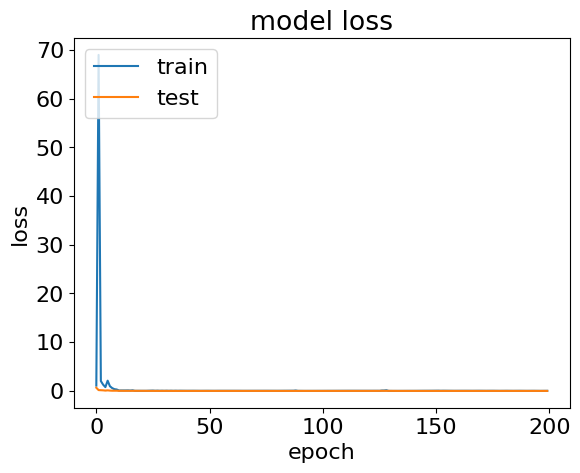

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
testPredict = model.predict(testX)

72/72 [==============================] - 1s 3ms/step


In [ ]:
testPredict2 = standardize_inverse(testPredict, means[-1], standard_devs[-1])
testy2 = standardize_inverse(testy, means[-1], standard_devs[-1])

In [ ]:
testScore = math.sqrt(mean_squared_error(testy2, testPredict2))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 43.24 RMSE


In [ ]:
actual, predicted = [], []
actual = testy2
predicted = testPredict2

<Figure size 640x480 with 0 Axes>

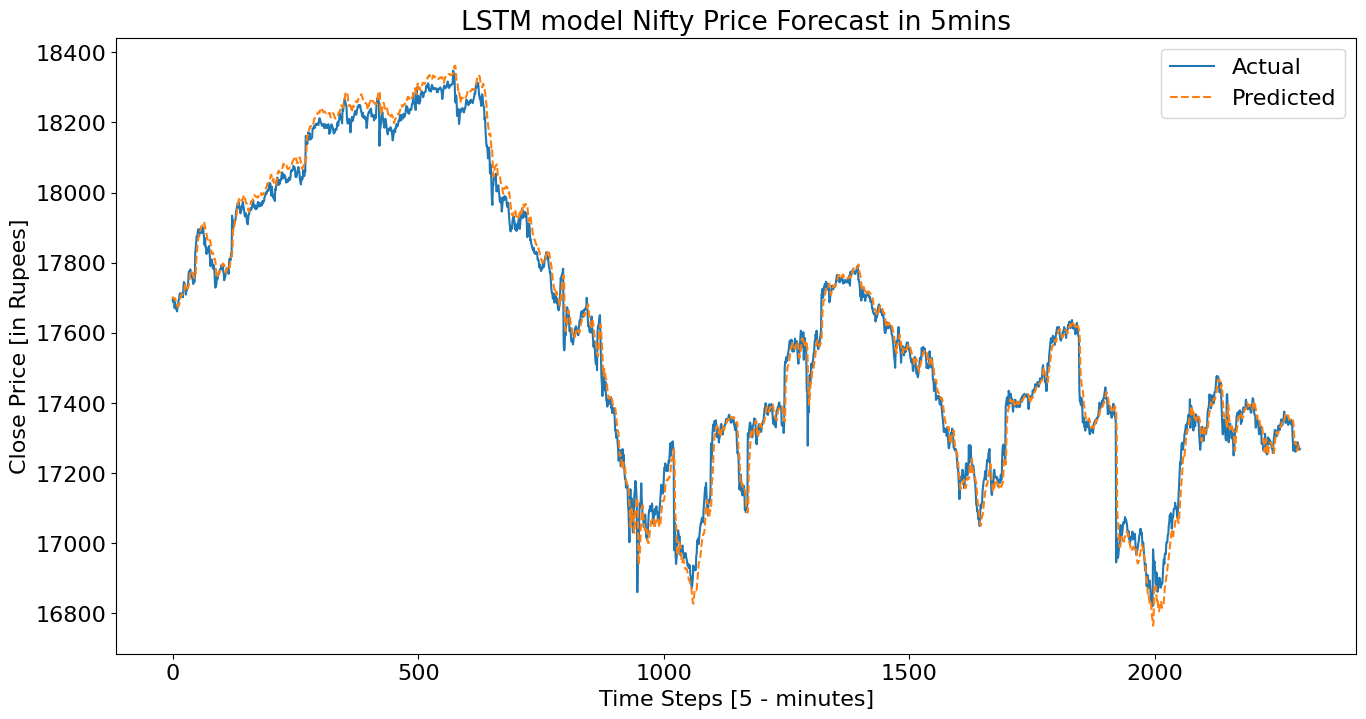

In [ ]:
plt.clf()
plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 16})
plt.plot(actual[:], label = 'Actual')
plt.plot(predicted[:], '--',label = 'Predicted')
plt.title('LSTM model Nifty Price Forecast in 5mins')
plt.ylabel('Close Price [in Rupees]')
plt.xlabel('Time Steps [5 - minutes]')
plt.legend()
plt.show()

# CNN - LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Reshape trainX and testX for CNN input
trainX_cnn = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
testX_cnn = testX.reshape((testX.shape[0], testX.shape[1], n_features))

# Define CNN-LSTM model
model_cnn_lstm = Sequential()

# CNN layers
model_cnn_lstm.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, n_features)))
model_cnn_lstm.add(MaxPooling1D(pool_size=1))  # Adjusted pool size

# LSTM layers
model_cnn_lstm.add(LSTM(50, activation='relu', return_sequences=True))  # Return sequences to keep the 3D shape

# Flatten before feeding into the Dense layer
model_cnn_lstm.add(Flatten())

# Output layer
model_cnn_lstm.add(Dense(1))

# Compile model
model_cnn_lstm.compile(optimizer='adam', loss='mse')


In [ ]:
model_cnn_lstm.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 1, 64)             960       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 lstm_20 (LSTM)              (None, 1, 50)             23000     
                                                                 
 flatten_2 (Flatten)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 24011 (93.79 KB)
Trainable params: 24011 (93.79 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
history_cnn_lstm = model_cnn_lstm.fit(trainX_cnn, trainy, epochs=200, batch_size=256,
                                      validation_split=0.2, verbose=1, shuffle=False)

Epoch 1/200
29/29 [==============================] - 4s 18ms/step - loss: 0.9059 - val_loss: 0.0642
Epoch 2/200
29/29 [==============================] - 0s 6ms/step - loss: 0.1252 - val_loss: 0.0071
Epoch 3/200
29/29 [==============================] - 0s 7ms/step - loss: 0.3129 - val_loss: 0.0308
Epoch 4/200
29/29 [==============================] - 0s 6ms/step - loss: 0.2884 - val_loss: 0.0108
Epoch 5/200
29/29 [==============================] - 0s 6ms/step - loss: 0.0159 - val_loss: 0.0033
Epoch 6/200
29/29 [==============================] - 0s 6ms/step - loss: 0.0160 - val_loss: 0.0049
Epoch 7/200
29/29 [==============================] - 0s 6ms/step - loss: 0.0109 - val_loss: 0.0034
Epoch 8/200
29/29 [==============================] - 0s 7ms/step - loss: 0.0122 - val_loss: 0.0042
Epoch 9/200
29/29 [==============================] - 0s 6ms/step - loss: 0.0097 - val_loss: 0.0033
Epoch 10/200
29/29 [==============================] - 0s 7ms/step - loss: 0.0135 - val_loss: 0.0041
Epoch 11

In [ ]:
model_cnn_lstm.save("/content/drive/MyDrive/Major Project 2/CNN_LSTM.h5")

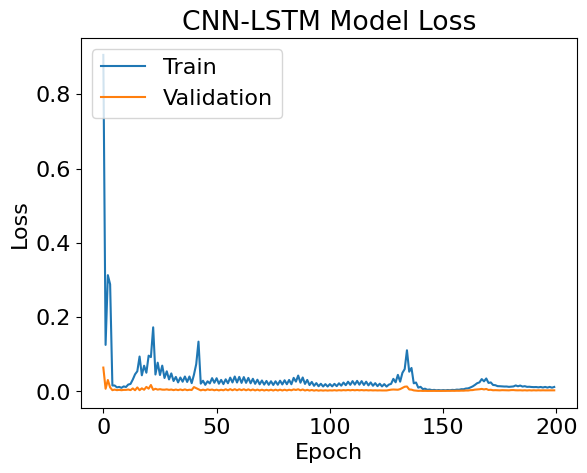

In [ ]:
# Plot loss history
plt.plot(history_cnn_lstm.history['loss'])
plt.plot(history_cnn_lstm.history['val_loss'])
plt.title('CNN-LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Predict using CNN-LSTM model
testPredict_cnn_lstm = model_cnn_lstm.predict(testX_cnn)
testPredict2_cnn_lstm = standardize_inverse(testPredict_cnn_lstm, means[-1], standard_devs[-1])

# Calculate RMSE
testScore_cnn_lstm = math.sqrt(mean_squared_error(testy2, testPredict2_cnn_lstm))
print('Test Score (CNN-LSTM): %.2f RMSE' % (testScore_cnn_lstm))


72/72 [==============================] - 1s 3ms/step
Test Score (CNN-LSTM): 44.16 RMSE


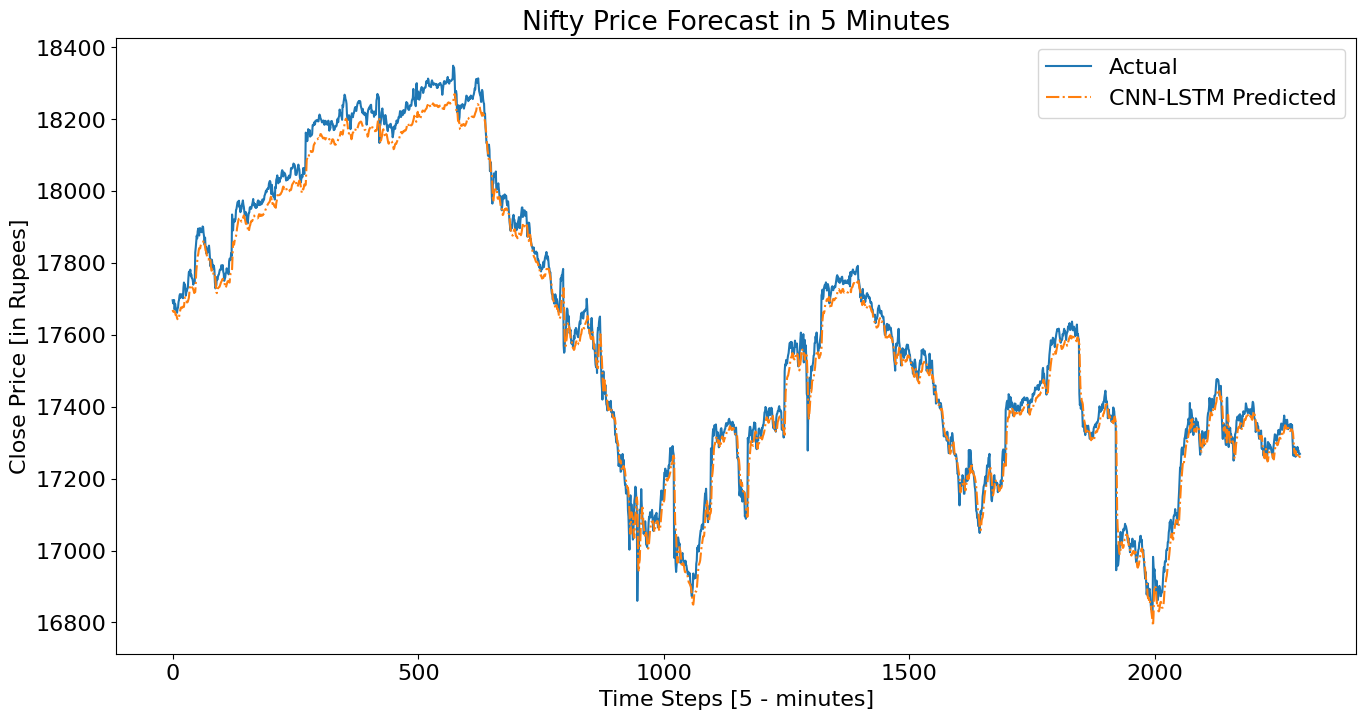

In [ ]:
# Plot actual vs predicted for CNN-LSTM
plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 16})
plt.plot(actual[:], label='Actual')
plt.plot(testPredict2_cnn_lstm[:], '-.', label='CNN-LSTM Predicted')
plt.title('Nifty Price Forecast in 5 Minutes')
plt.ylabel('Close Price [in Rupees]')
plt.xlabel('Time Steps [5 - minutes]')
plt.legend()
plt.show()


# GRU

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model_gru.add(GRU(units=50, return_sequences=True))
model_gru.add(GRU(units=50))
model_gru.add(Dense(units=1))

# Compile the model
model_gru.compile(optimizer='adam', loss='mse')

In [ ]:
# Summary of the model
model_gru.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 2, 50)             8850      
                                                                 
 gru_2 (GRU)                 (None, 2, 50)             15300     
                                                                 
 gru_3 (GRU)                 (None, 50)                15300     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 39501 (154.30 KB)
Trainable params: 39501 (154.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_gru = model_gru.fit(trainX, trainy, epochs=200, batch_size=256, validation_split=0.2, verbose=1, shuffle=False)

Epoch 1/200
29/29 [==============================] - 7s 45ms/step - loss: 0.5509 - val_loss: 0.0915
Epoch 2/200
29/29 [==============================] - 0s 7ms/step - loss: 0.0563 - val_loss: 0.0077
Epoch 3/200
29/29 [==============================] - 0s 7ms/step - loss: 0.1812 - val_loss: 0.0467
Epoch 4/200
29/29 [==============================] - 0s 9ms/step - loss: 0.0660 - val_loss: 0.0298
Epoch 5/200
29/29 [==============================] - 0s 8ms/step - loss: 0.0257 - val_loss: 0.0039
Epoch 6/200
29/29 [==============================] - 0s 7ms/step - loss: 0.0859 - val_loss: 0.0237
Epoch 7/200
29/29 [==============================] - 0s 9ms/step - loss: 0.0379 - val_loss: 0.0134
Epoch 8/200
29/29 [==============================] - 0s 8ms/step - loss: 0.0265 - val_loss: 0.0024
Epoch 9/200
29/29 [==============================] - 0s 9ms/step - loss: 0.0436 - val_loss: 0.0127
Epoch 10/200
29/29 [==============================] - 0s 8ms/step - loss: 0.0252 - val_loss: 0.0158
Epoch 11

In [ ]:
model.save("")

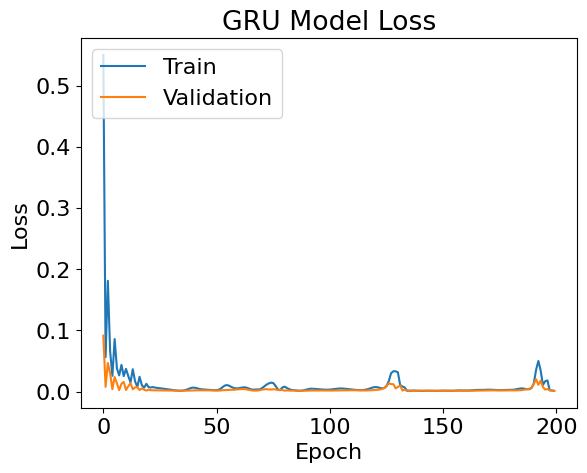

In [ ]:
# Plot loss history
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

72/72 [==============================] - 0s 4ms/step
Test Score (GRU): 17599.99 RMSE


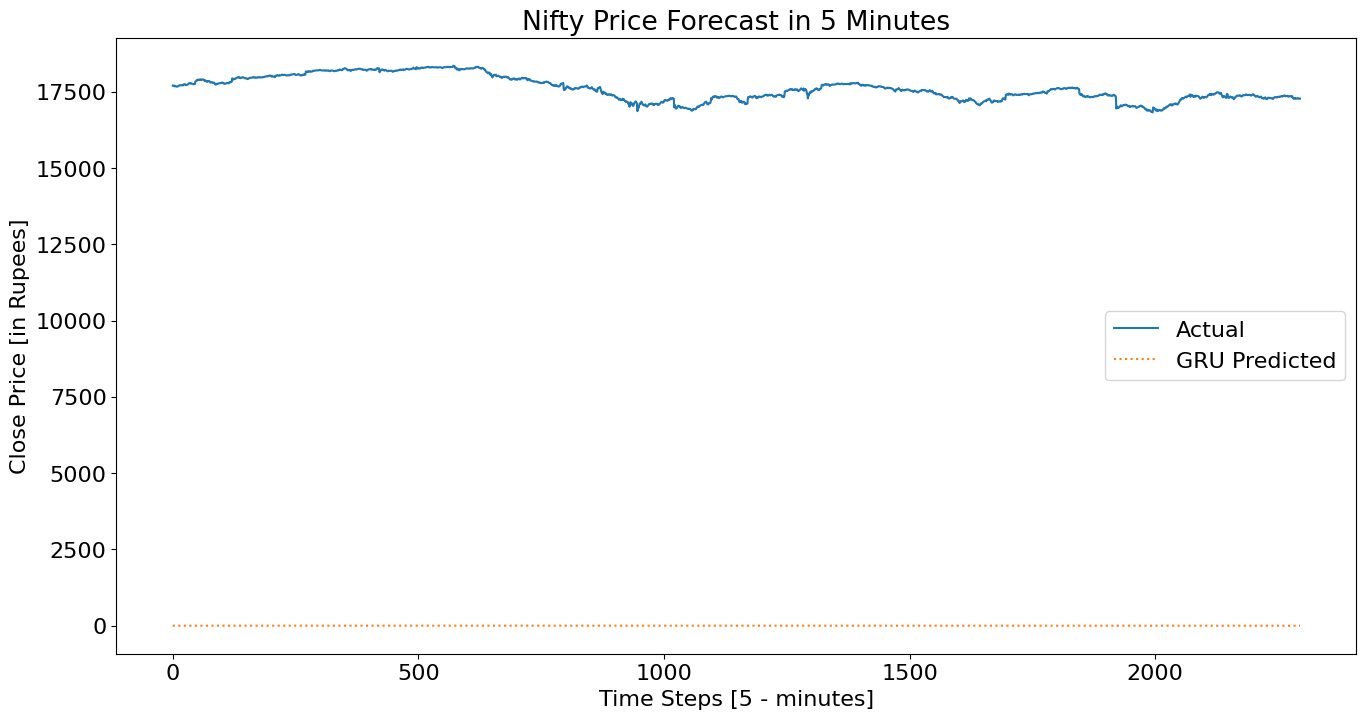

In [ ]:
# Predict on test data
testPredict_gru = model_gru.predict(testX)

# Calculate RMSE
testScore_gru = math.sqrt(mean_squared_error(testy2, testPredict_gru))
print('Test Score (GRU): %.2f RMSE' % (testScore_gru))

# Plot actual vs predicted for GRU
plt.figure(figsize=(16, 8))
plt.plot(actual[:], label='Actual')
plt.plot(testPredict_gru, ':', label='GRU Predicted')
plt.title('Nifty Price Forecast in 5 Minutes')
plt.ylabel('Close Price [in Rupees]')
plt.xlabel('Time Steps [5 - minutes]')
plt.legend()
plt.show()